In [59]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def gdc_for_linear(n_points, alpha, epsilon):
    m = random.uniform(-10, 10)
    b = random.uniform(-10, 10)
    n = len(n_points)
    iter = 0
    while True:
        iter += 1
        delta_m = 0
        delta_b = 0
        for point in n_points:
            delta_m += 2 * b * point[0] + 2 * m * point[0] * point[0] - 2 * point[0] * point[1]
            delta_b += 2 * b + 2 * m * point[0] - 2 * point[1]
        delta_m /= n
        delta_b /= n

        m -= alpha * delta_m
        b -= alpha * delta_b
        norm = math.sqrt(delta_m * delta_m + delta_b * delta_b)

        if norm < epsilon:
            return m, b, iter
        
def gdc_for_second_order(n_points, alpha, epsilon):
    h = random.uniform(-10, 10)
    m = random.uniform(-10, 10)
    b = random.uniform(-10, 10)
    n = len(n_points)
    i = 0
    norm_lst = []
    iter_lst = []
    while True:
        i += 1
        iter_lst.append(i)
        delta_h = 0
        delta_m = 0
        delta_b = 0
        for point in n_points:
            delta_h += 2.0 * (point[1] - h * (point[0] ** 2) - m * point[0] - b) * (-point[0] ** 2.0)
            delta_m += 2.0 * (point[1] - h * (point[0] ** 2) - m * point[0] - b) * (-point[0])
            delta_b += 2.0 * (point[1] - h * (point[0] ** 2) - m * point[0] - b) * (-1.0)
        delta_h /= n
        delta_m /= n
        delta_b /= n

        h -= (alpha * delta_h)
        m -= (alpha * delta_m)
        b -= (alpha * delta_b)

        norm = math.sqrt((delta_h ** 2) + (delta_m ** 2) + (delta_b ** 2))
        norm_lst.append(norm)
        # print(norm)
        if norm < epsilon:

            return h, m, b, i, iter_lst,norm_lst


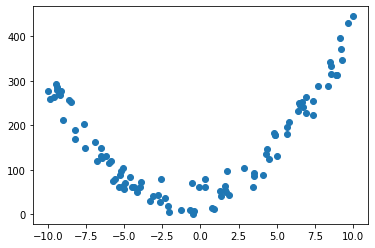

In [4]:
points = pd.read_csv("points.txt", sep="\t")

plt.scatter(points['x'], points['y'])
x = np.linspace(-10, 10, 200)

In [ ]:
h, m, b, i,iter_lst_00005,norm_lst00005 = gdc_for_second_order(points.values, 0.000025, 0.001)

In [40]:
h, m, b, i,iter_lst_00005,norm_lst00005 = gdc_for_second_order(points.values, 0.00005, 0.001)

In [52]:
h, m, b, i,iter_lst_0001,norm_lst0001 = gdc_for_second_order(points.values, 0.0001, 0.001)

In [41]:
h, m, b, i,iter_lst_00025,norm_lst00025 = gdc_for_second_order(points.values, 0.00025, 0.001)

In [50]:
h, m, b, i,iter_lst_0004,norm_lst0004 = gdc_for_second_order(points.values, 0.00004, 0.001)

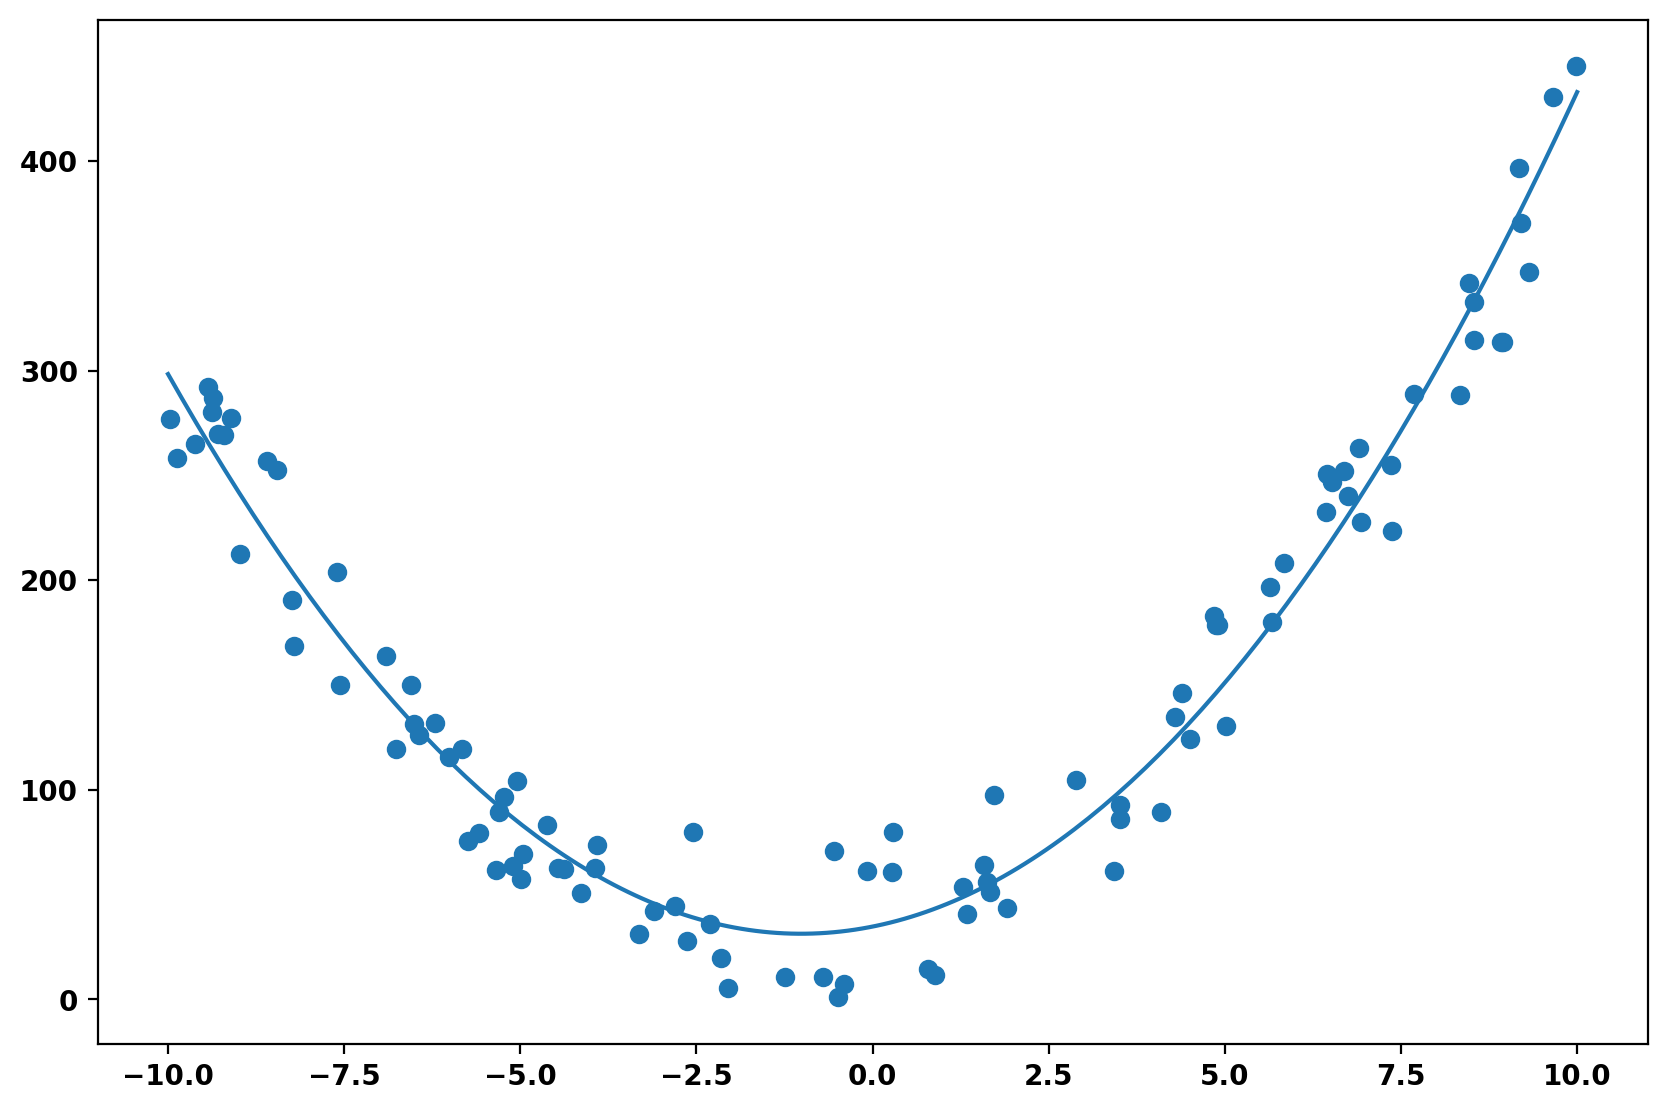

In [78]:
y = h * (x ** 2) + m * x + b
plt.figure(figsize=(10, 6.78), dpi = 200)
plt.scatter(points['x'], points['y'])
x = np.linspace(-10, 10, 200)
plt.plot(x, y)
plt.show()


In [74]:
font = {'size'   : 10}

matplotlib.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


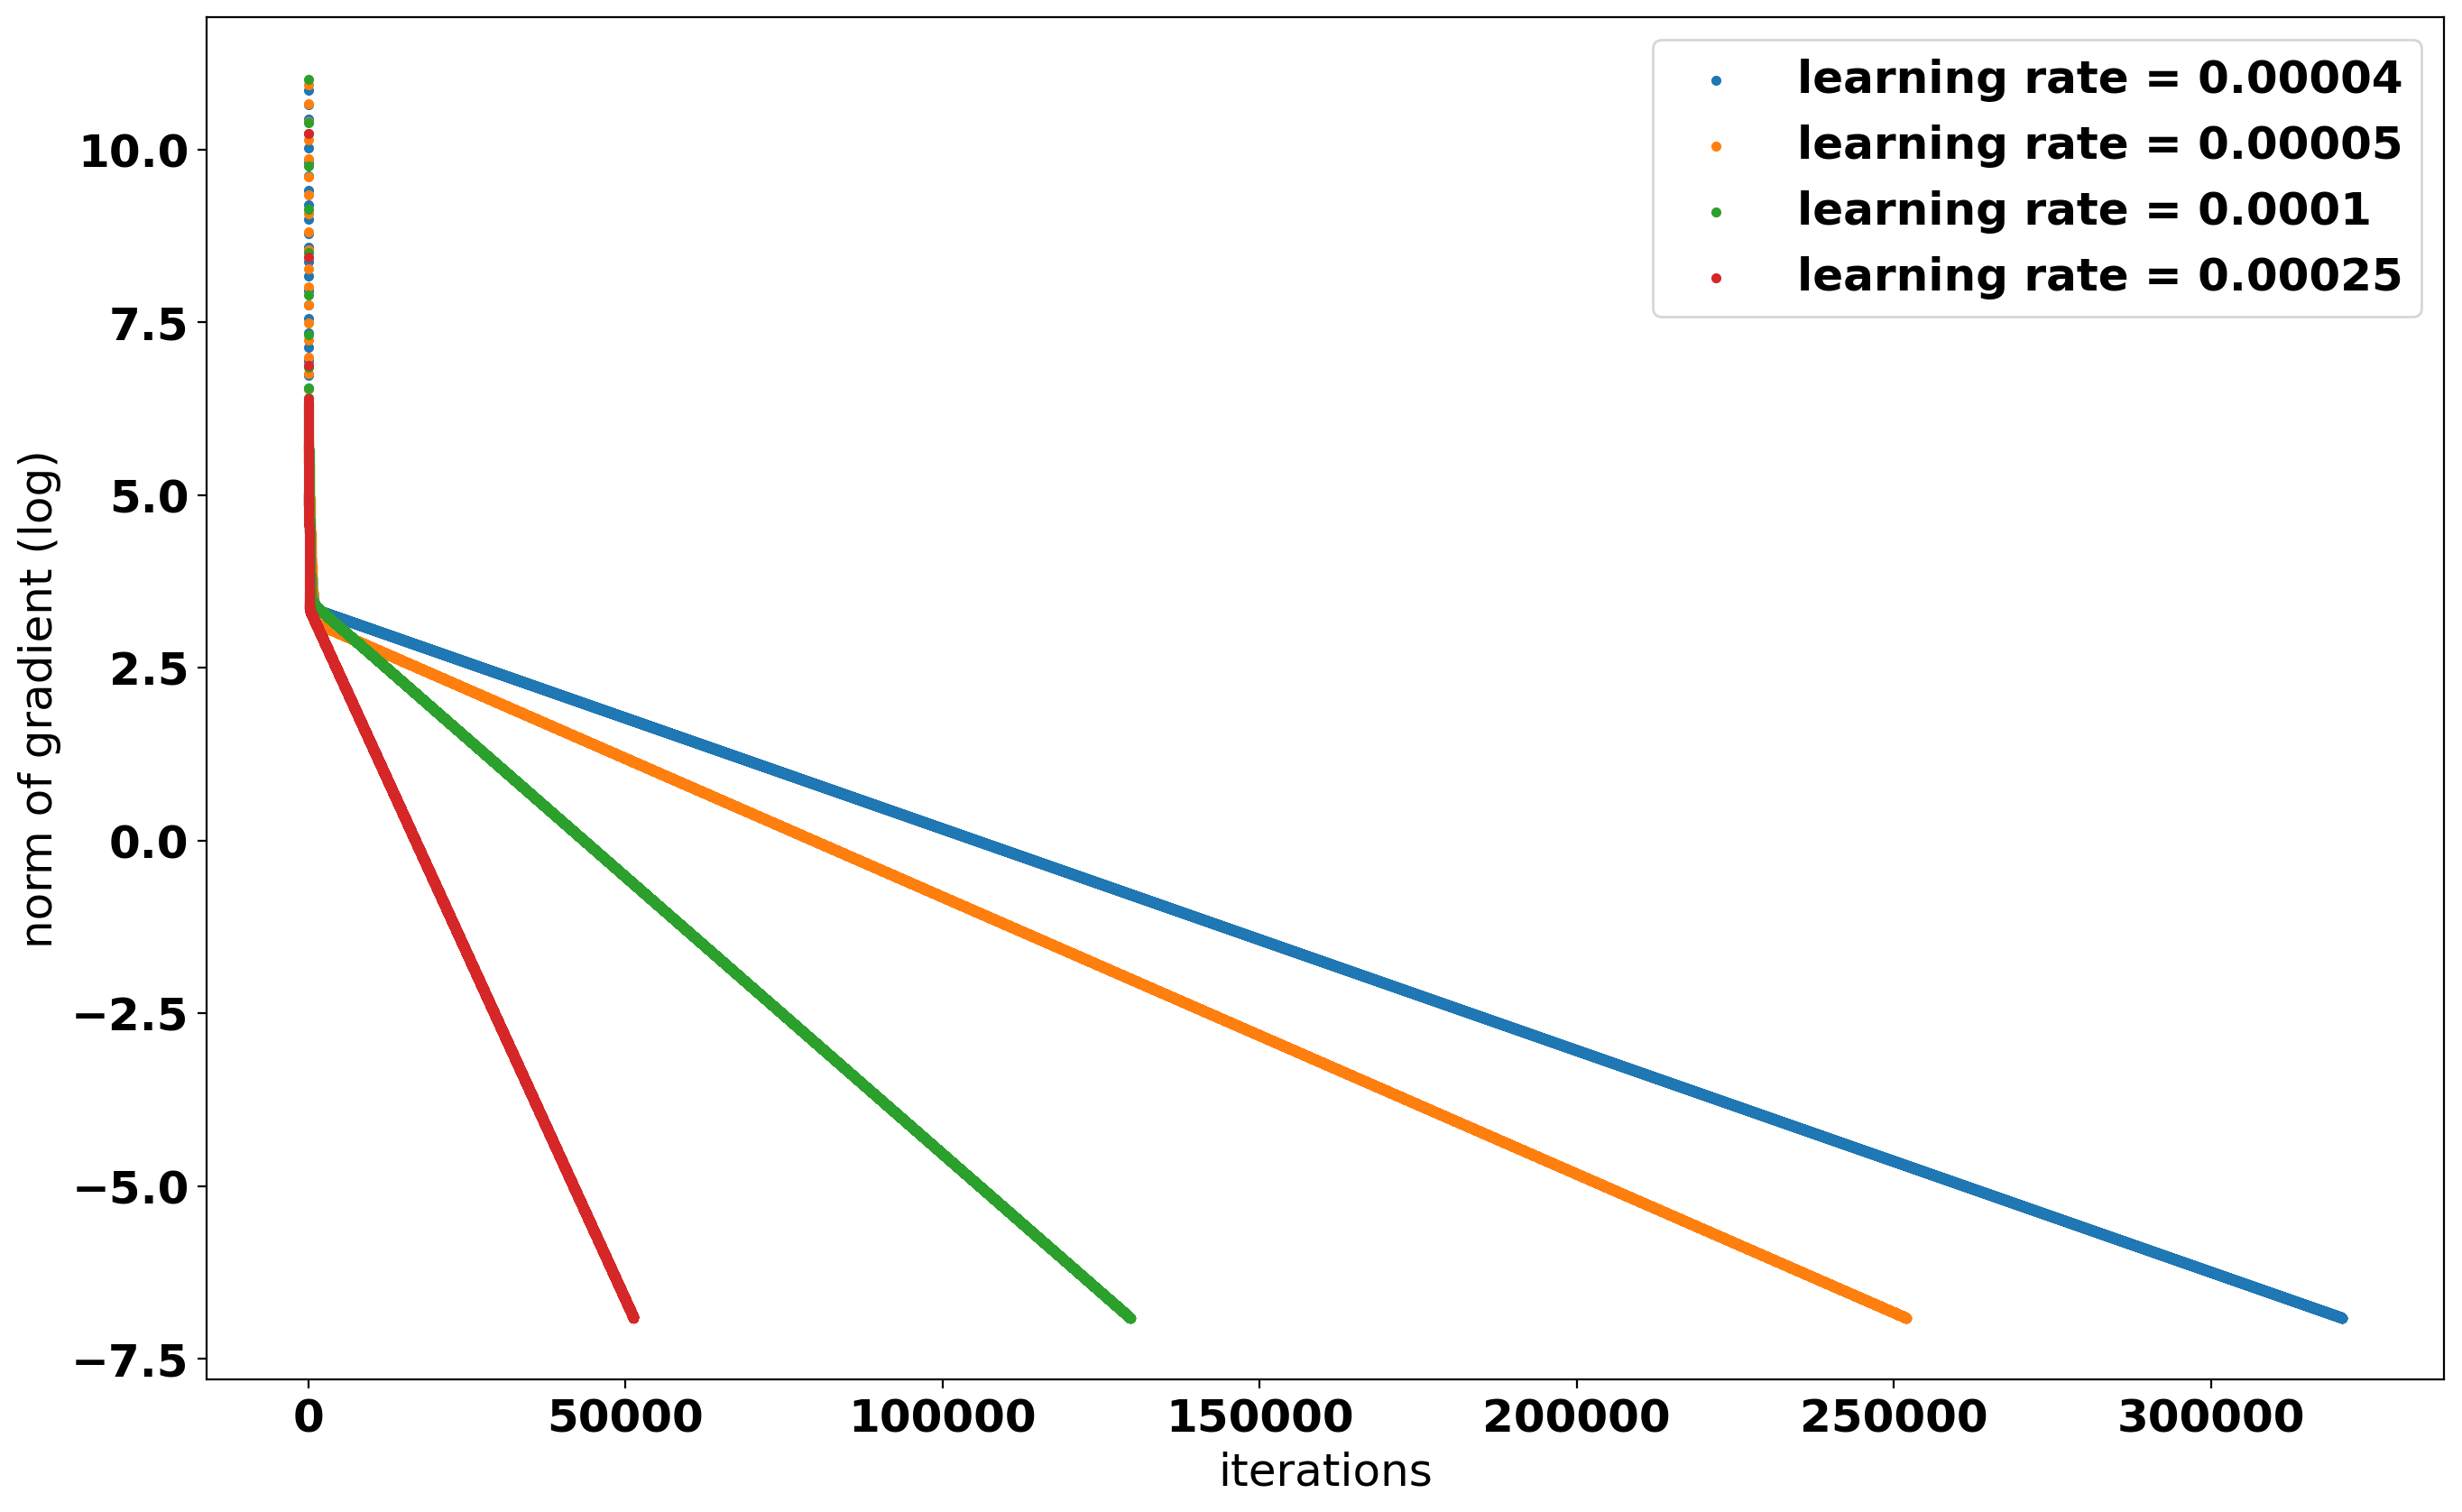

In [66]:
plt.figure(figsize=(16, 10), dpi = 200)
plt.xlabel('iterations')
plt.ylabel('norm of gradient (log)')
plt.scatter(iter_lst_0004[:], np.log(norm_lst0004)[:], marker = '.', label = 'learning rate = 0.00004')
plt.scatter(iter_lst_00005[:], np.log(norm_lst00005)[:], marker = '.', label = 'learning rate = 0.00005')
plt.scatter(iter_lst_0001[:], np.log(norm_lst0001)[:], marker = '.', label = 'learning rate = 0.0001')
plt.scatter(iter_lst_00025[:], np.log(norm_lst00025)[:], marker = '.', label = 'learning rate = 0.00025')
plt.legend()
plt.show()